### Distance and Distance Matrix [20-03-2024]

### 1.Take two 3D coordinates from the user. Find out the distance between these pointsusing following distance functions. x and y are vectors representing the coordinates of two points. Here, k=3

In [7]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

# Function to calculate Manhattan distance
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

# Function to calculate Minkowski distance
def minkowski_distance(x, y, k):
    return np.power(np.sum(np.power(np.abs(x - y), k)), 1/k)

try:
    x = np.array(list(map(float, input("Enter the first  coordinate : ").split(','))))
    y = np.array(list(map(float, input("Enter the second  coordinate: ").split(','))))
except ValueError:
    print("Invalid input. Generating random coordinates.")
    x = np.random.rand(3)
    y = np.random.rand(3)

euclidean_dist = euclidean_distance(x, y)
manhattan_dist = manhattan_distance(x, y)
minkowski_dist = minkowski_distance(x, y, 3)

# Print the coordinates and distances
print(f"Euclidean Distance: {euclidean_dist}")
print(f"Manhattan Distance: {manhattan_dist}")
print(f"Minkowski Distance (k=3): {minkowski_dist}")

Enter the first  coordinate : 1,5,10
Enter the second  coordinate: 2,12,28
Euclidean Distance: 19.339079605813716
Manhattan Distance: 26.0
Minkowski Distance (k=3): 18.3471704536862


### 2.Import the Iris dataset. Write a program to obtain the Euclidian Distance Matrix for all the data samples in the feature space. Distance metric is a 2D array, where the(i,j)th entry represents the distance between the ith and jth sample points in the feature space.

In [5]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Function to calculate Euclidean distance between two points
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# Calculate the number of samples
n_samples = X.shape[0]

# Initialize the Euclidean Distance Matrix
dist_matrix = np.zeros((n_samples, n_samples))

# Calculate the Euclidean Distance Matrix
for i in range(n_samples):
    for j in range(n_samples):
        dist_matrix[i, j] = euclidean_distance(X[i], X[j])

# Print the Euclidean Distance Matrix
print("Euclidean Distance Matrix:")
print(dist_matrix)

Euclidean Distance Matrix:
[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


### 3.Import the Iris dataset. Prepare a dataset considering samples belong to any two output classes. Draw the scatter plot for all the samples in the new dataset considering any two input attributes. Examine the scatter plot to find the equation of a line that can separate sample of two classes.

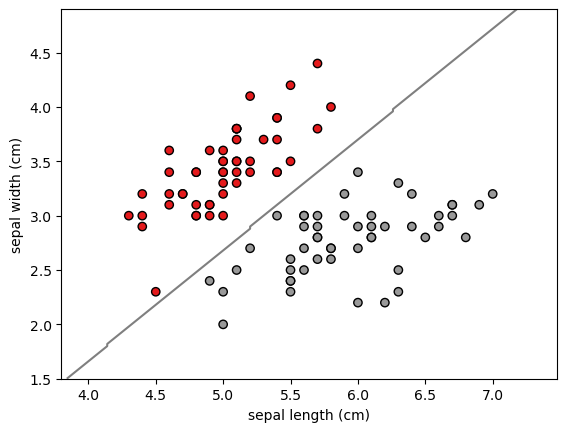

Equation of the line: y = -3.0220096962892713x + -7.306345489594475


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Select samples from two classes
class_0 = np.where(y == 0)
class_1 = np.where(y == 1)
X = np.concatenate((X[class_0], X[class_1]), axis=0)
y = np.concatenate((y[class_0], y[class_1]), axis=0)

# Select two input attributes
X = X[:, :2]  # Assuming we're using the first two features

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Logistic Regression to find the separation line
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Display the plot
plt.show()

# Print the equation of the line
print(f"Equation of the line: y = {log_reg.coef_[0][1]}x + {log_reg.intercept_[0]}")
